In [129]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from skimage.filters import sobel

In [130]:

image = cv2.imread("/kaggle/input/datasets/mahmudulhasantasin/data-science-bowl-80-10-10/data_science_bowl_2018-10-fold/fold3/img/0c6507d493bf79b2ba248c5cca3d14df8b67328b89efa5f4a32f97a06a88c92c.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


_, thresh = cv2.threshold(gray, 0, 255,
                          cv2.THRESH_BINARY + cv2.THRESH_OTSU)  


kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)


dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
cv2.normalize(dist_transform, dist_transform, 0, 1.0, cv2.NORM_MINMAX)  

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [131]:

markers_auto, _ = ndi.label(dist_transform > 0.3)  
labels_no_markers = watershed(gradient,
                              markers=markers_auto,
                              mask=opening.astype(bool))

In [132]:

coords = peak_local_max(dist_transform,
                        min_distance=15,
                        labels=opening.astype(bool))

mask_peaks = np.zeros(dist_transform.shape, dtype=bool)
mask_peaks[tuple(coords.T)] = True
markers = ndi.label(mask_peaks)[0]


markers[opening == 0] = -1 

labels_markers = watershed(-dist_transform,
                           markers,
                           mask=opening.astype(bool))

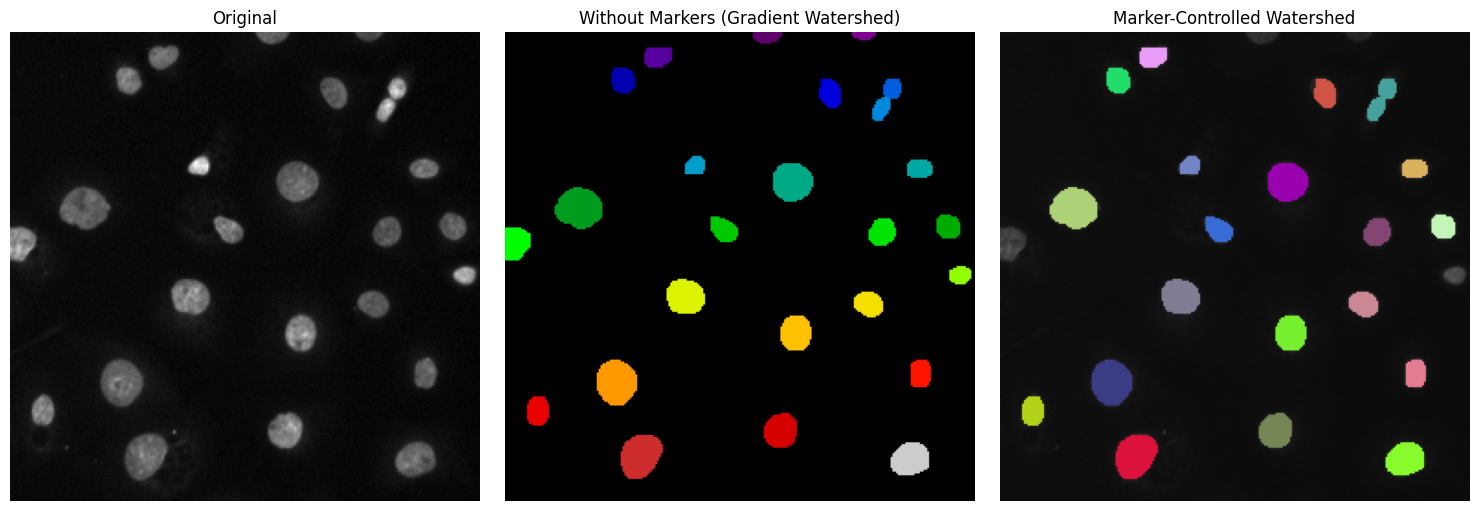

Nuclei detected (marker-controlled): 20
Nuclei detected (marker-uncontrolled): 25


In [133]:

overlay = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
for label in np.unique(labels_markers):
    if label <= 0:
        continue
    color = np.random.randint(0, 255, 3).tolist()
    overlay[labels_markers == label] = color

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(gray, cmap='gray')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Without Markers (Gradient Watershed)")
plt.imshow(labels_no_markers, cmap='nipy_spectral')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Marker-Controlled Watershed")
plt.imshow(overlay)
plt.axis("off")

plt.tight_layout()
plt.show()


print(f"Nuclei detected (marker-controlled): {labels_markers.max()}")
print(f"Nuclei detected (without-uncontrolled): {labels_no_markers.max()}")